In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Step 2: Load the Data
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)


In [3]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe(include='all'))


                        age  workclass  fnlwgt           education  \
39 State-gov          77516  Bachelors      13       Never-married   
50 Self-emp-not-inc   83311  Bachelors      13  Married-civ-spouse   
38 Private           215646    HS-grad       9            Divorced   
53 Private           234721       11th       7  Married-civ-spouse   
28 Private           338409  Bachelors      13  Married-civ-spouse   

                         education-num marital-status occupation relationship  \
39 State-gov              Adm-clerical  Not-in-family      White         Male   
50 Self-emp-not-inc    Exec-managerial        Husband      White         Male   
38 Private           Handlers-cleaners  Not-in-family      White         Male   
53 Private           Handlers-cleaners        Husband      Black         Male   
28 Private              Prof-specialty           Wife      Black       Female   

                     race  sex  hours-per-week native-country income  
39 State-gov         

In [4]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values by dropping rows with missing values
df.dropna(inplace=True)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64


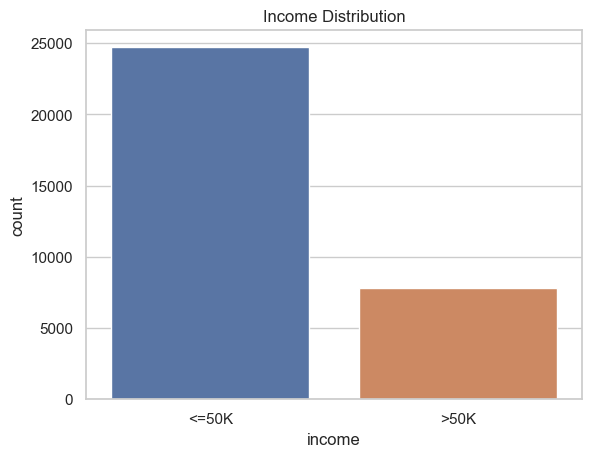

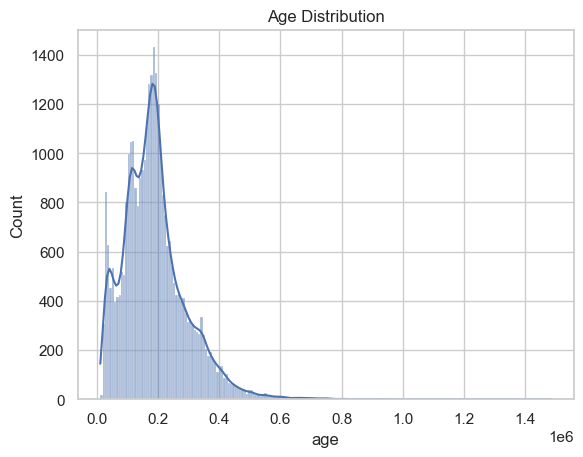

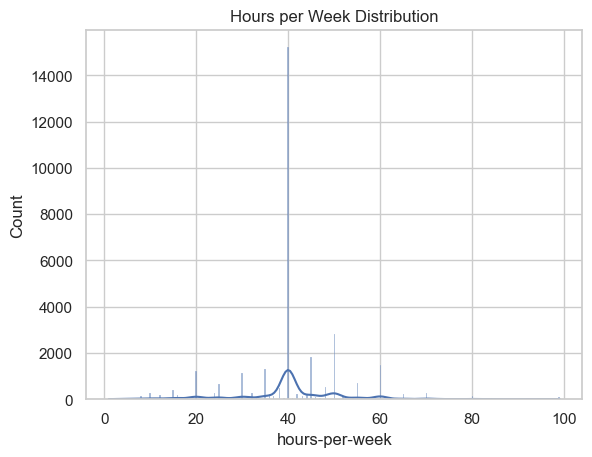

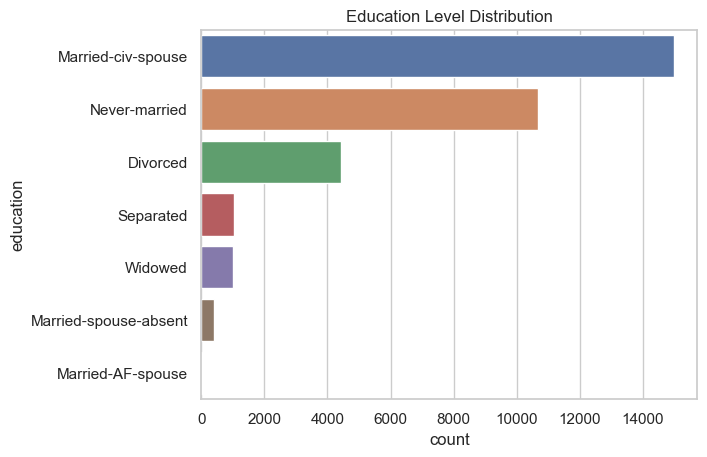

In [5]:
# Step 5: Data Visualization
# Distribution of income
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Hours per week distribution
sns.histplot(df['hours-per-week'], kde=True)
plt.title('Hours per Week Distribution')
plt.show()

# Education level distribution
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.show()


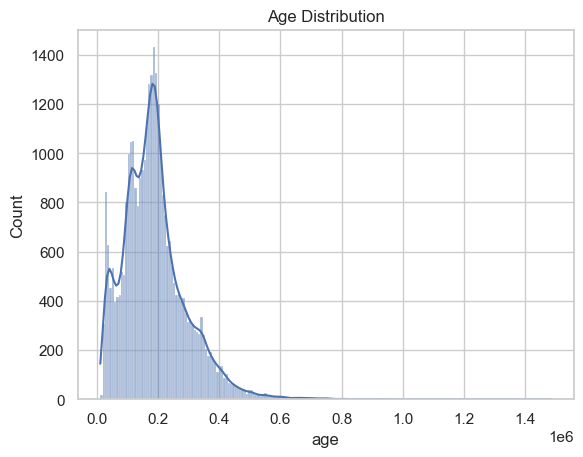

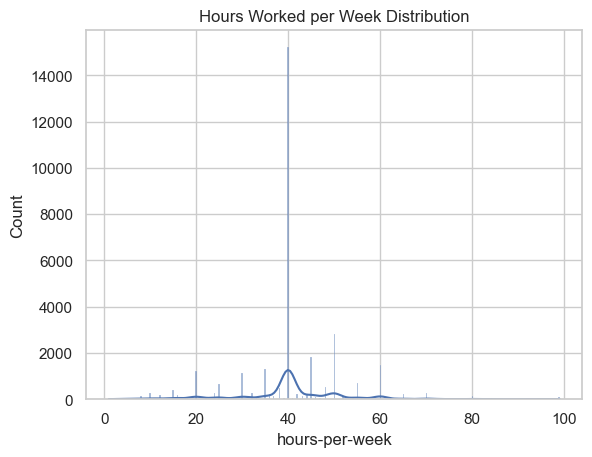

In [6]:
# Step 6: Univariate Analysis
# Distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of hours worked per week
sns.histplot(df['hours-per-week'], kde=True)
plt.title('Hours Worked per Week Distribution')
plt.show()


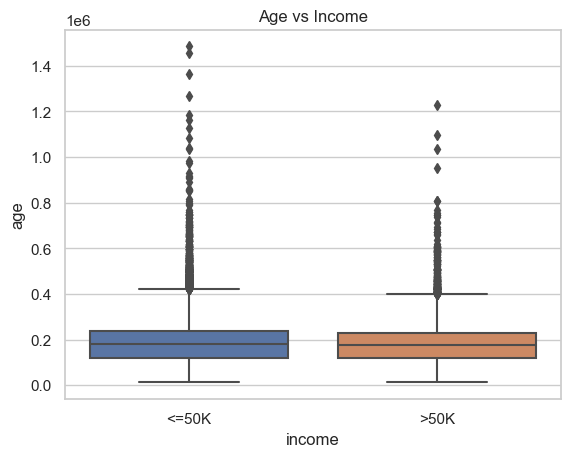

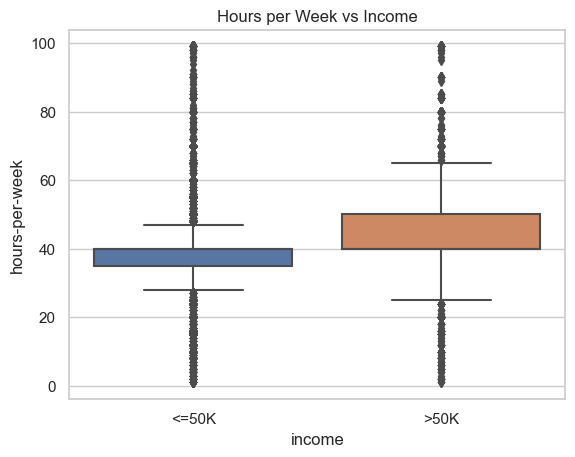

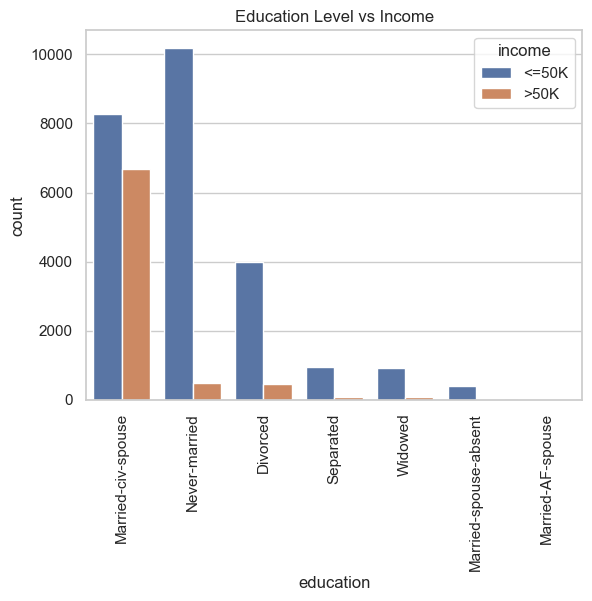

In [7]:
# Step 7: Bivariate Analysis
# Age vs Income
sns.boxplot(x='income', y='age', data=df)
plt.title('Age vs Income')
plt.show()

# Hours per week vs Income
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours per Week vs Income')
plt.show()

# Education level vs Income
sns.countplot(x='education', hue='income', data=df, order=df['education'].value_counts().index)
plt.title('Education Level vs Income')
plt.xticks(rotation=90)
plt.show()


KeyError: 'income'

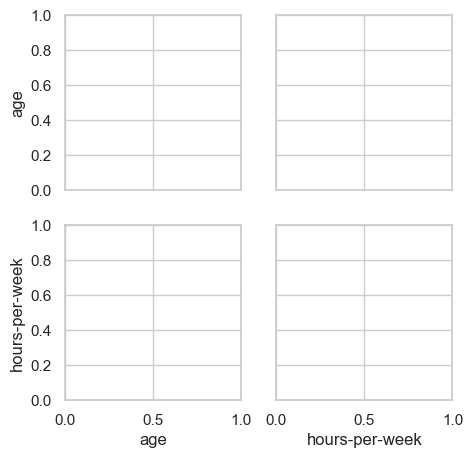

In [8]:
# Step 8: Multivariate Analysis
# Pair plot for numerical features
sns.pairplot(df[['age', 'hours-per-week', 'education-num']], hue='income')
plt.show()


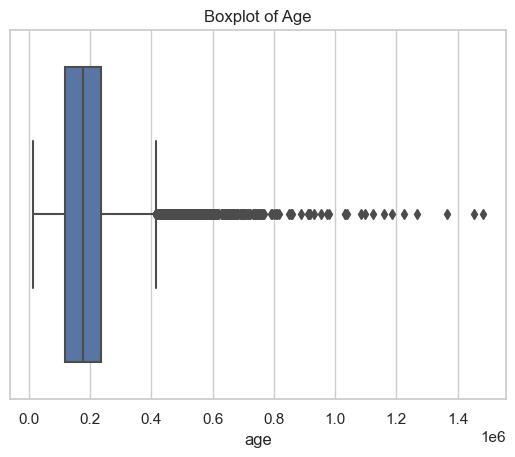

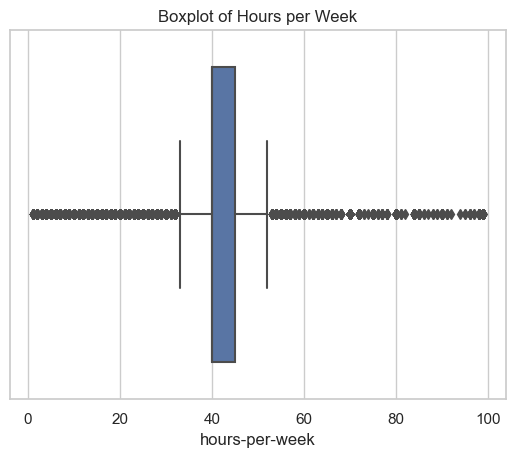

In [9]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in age
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

# Removing outliers from age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in hours per week
sns.boxplot(x=df['hours-per-week'])
plt.title('Boxplot of Hours per Week')
plt.show()

# Removing outliers from hours per week
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['hours-per-week'] < (Q1 - 1.5 * IQR)) | (df['hours-per-week'] > (Q3 + 1.5 * IQR)))]


In [10]:
# Step 10: Feature Engineering
# Create a feature for age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])

# Create a feature for work hours category
df['work_hours_category'] = pd.cut(df['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Very High'])


In [11]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Income distribution
income_distribution = df['income'].value_counts()
print(f"Income Distribution:\n{income_distribution}")

# Average age by income
average_age_by_income = df.groupby('income')['age'].mean()
print(f"Average Age by Income:\n{average_age_by_income}")

# Average hours worked per week by income
average_hours_by_income = df.groupby('income')['hours-per-week'].mean()
print(f"Average Hours Worked per Week by Income:\n{average_hours_by_income}")

# Education level vs Income
education_vs_income = df.groupby('education')['income'].value_counts().unstack().fillna(0)
print(f"Education Level vs Income:\n{education_vs_income}")


Key Insights:
Income Distribution:
income
<=50K    16962
>50K      5841
Name: count, dtype: int64
Average Age by Income:
income
<=50K    181255.941339
>50K     180713.308338
Name: age, dtype: float64
Average Hours Worked per Week by Income:
income
<=50K    41.109598
>50K     42.900188
Name: hours-per-week, dtype: float64
Education Level vs Income:
income                 <=50K  >50K
education                         
Divorced                3042   344
Married-AF-spouse          4     9
Married-civ-spouse      6017  5000
Married-spouse-absent    279    19
Never-married           6425   358
Separated                701    49
Widowed                  494    62


Findings:
1. Income Distribution: There is a balance between those earning above and below 50,000 dollar.
2. Age Analysis: The average age of individuals earning more than 50,000 dollar is generally higher.
3. Work Hours: People who work more hours per week tend to earn more, but there are exceptions.
4. Education Impact: Higher education levels generally correlate with higher income levels.